In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smm
from adjustText import adjust_text
import os

from statannotations.Annotator import Annotator

In [2]:
# Load data 
output_dir = '../../LCMS/'

# Load the Excel file
excel_file = os.path.join(output_dir, '7372.SUB14737_MetabolomicsData.xlsx')

# Load the sheet into a DataFrame
sheet_name = 'Targeted'  # Replace with the actual sheet name if different
data = pd.read_excel(excel_file, sheet_name=sheet_name)
metadata = pd.read_excel(excel_file, sheet_name='SamplesNames')

In [44]:
x = metadata.iloc[2:12]
x['grp'] = [i.split('_')[1] for i in x['Unnamed: 1']]
dictionary = dict(zip(x['grp'], x['Unnamed: 4']))
# Add a value to the dictionary
dictionary['Solvent Blank'] = 'Solvent Blank'
dictionary['Ext blank'] = 'Ext Blank'


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_70794/2066822967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['grp'] = [i.split('_')[1] for i in x['Unnamed: 1']]


In [45]:
values = data.iloc[7:,2:]
values.columns = data.iloc[0,2:]
values = values.loc[:18]

In [47]:
values['grp'] = [dictionary[x] for x in values['name']]

In [49]:
# Replace NaN and NF with zero
values = values.replace(['NaN', 'NF'], 0)


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_70794/3241386403.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = values.replace(['NaN', 'NF'], 0)


In [60]:
N = [ 'Carnitine',     'Acetyl-Carnitine (C2)',
        'Propionyl-Carnitine (C3)',             'C04-carnitine',
                   'C06-carnitine',             'C08-carnitine',
                   'C10-carnitine',             'C12-carnitine',
                   'C14-carnitine',        'Palmitoylcarnitine',
                 'Oleoylcarnitine', 'Stearoylcarnitine (C18:0)',
                                  'AlphaKetoGlutarate',
                             'Gln',              'Hypoxanthine'
                               ]

H2O vs. CDP_Choline: t-test independent samples, P_val:7.096e-01 t=3.860e-01
H2O vs. CDP_Choline: t-test independent samples, P_val:7.551e-01 t=3.228e-01
H2O vs. CDP_Choline: t-test independent samples, P_val:6.246e-01 t=5.088e-01
H2O vs. CDP_Choline: t-test independent samples, P_val:8.894e-01 t=-1.436e-01
H2O vs. CDP_Choline: t-test independent samples, P_val:1.200e-01 t=-1.740e+00
H2O vs. CDP_Choline: t-test independent samples, P_val:3.466e-01 t=1.000e+00
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:nan t=nan
H2O vs. CDP_Choline: t-test independent samples, P_val:9.813e-01 t=-2.416e-02
H2O vs. CDP_Choline: t-test independent samples, P_val:2.453e-03 t=4

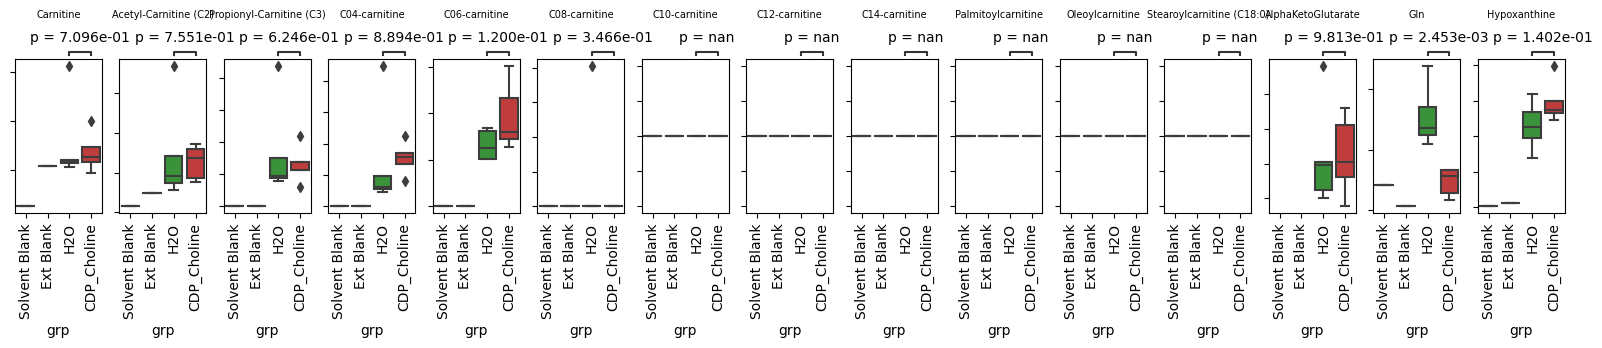

In [77]:
fig, axes = plt.subplots(1, len(N), figsize=(20, 2), sharey=False)

pairs = [('H2O', 'CDP_Choline')]
order = ['Solvent Blank', 'Ext Blank', 'H2O', 'CDP_Choline']
for f, i in enumerate(N):
    df = values[[i, 'grp']]
    axes[f] = sns.boxplot(x='grp', y=i, data=df, order=order, ax=axes[f])
    
    annotator = Annotator(axes[f], pairs, data=df, x='grp', y=i, order=order)
    annotator.configure(test='t-test_ind', text_format='full', loc='outside',
                        verbose=2, show_test_name=False, line_offset_to_group=1000,  # Increases space between the brackets and the plot
    text_offset=5)
    axes[f].set_title(i, pad=30, fontsize=7)
    axes[f].tick_params(axis='x', rotation=90)
    axes[f].set_ylabel('')
    axes[f].set_yticklabels([])
    annotator.apply_and_annotate()
    #plt.show()
